<a href="https://colab.research.google.com/github/KingCyrus/100-days-of-code/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
data = fetch_openml("mnist_784") # fetch the mnist dataset

In [ ]:
data.keys() # check the columns

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X = data['data'] # X or the features values
y = data['target'] # y or the target values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42) # split the datasets into test and train

In [ ]:
num = X_train[0]
num = num.reshape(28,28)

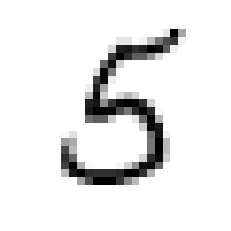

In [ ]:
plt.imshow(num,cmap='binary');
plt.axis("off");

In [ ]:
y_train[0]

'5'

In [ ]:
#get a list of possible values for the weights and n_neighbors hyperparameters
p_neighbors = [3,5,10]
weights = ['uniform','distance']

In [ ]:
params = {'n_neighbors': p_neighbors,'weights': weights} #create a dictionary of parameters for gridsearchcv 

In [ ]:
KNN = KNeighborsClassifier() #initialize the KNeighborsClassifier

In [ ]:
clf = GridSearchCV(KNN, param_grid = params,cv=3) # perform a gridsearch on possible values for KNN hyperparameters using cv=3

In [ ]:
clf.fit(X_train,y_train) # fit the model on the traning set using the best params from the gridsearch

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_pred = clf.predict(X_test) # predict targets for the X_test dataset

In [ ]:
accuracy_score(y_test,knn_pred) # check the accuracy score of your model

0.9728571428571429